# Assignment 5 


Question 2 

In [44]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist 
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [45]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])      

In [48]:
import time
Wtbofore = time.time_ns()
cpubefore = time.process_time_ns()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7306 - accuracy: 0.7615 - val_loss: 0.5278 - val_accuracy: 0.8150
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4879 - accuracy: 0.8311 - val_loss: 0.4424 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4431 - accuracy: 0.8468 - val_loss: 0.4298 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4152 - accuracy: 0.8555 - val_loss: 0.4136 - val_accuracy: 0.8498
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3951 - accuracy: 0.8635 - val_loss: 0.3848 - val_accuracy: 0.8582
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3780 - accuracy: 0.8680 - val_loss: 0.3769 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3645 - accuracy: 0.8720 - val_loss: 0.3788 - val_accuracy:

In [49]:
print("Wall Time:",(time.time_ns()-Wtbofore),"CPU Time:",time.process_time_ns()-cpubefore)

Wall Time: 400136143000 CPU Time: 336854278000


In [7]:
history.history

{'loss': [0.7219311594963074,
  0.4896271228790283,
  0.4426136314868927,
  0.41607239842414856,
  0.394116073846817,
  0.379914253950119,
  0.3657817840576172,
  0.35348719358444214,
  0.34347087144851685,
  0.3344762325286865,
  0.32517436146736145,
  0.3170083463191986,
  0.30941179394721985,
  0.30215054750442505,
  0.2962495982646942,
  0.28974318504333496,
  0.28418397903442383,
  0.27701351046562195,
  0.2722567915916443,
  0.2678401470184326,
  0.2630671560764313,
  0.25723087787628174,
  0.2533494234085083,
  0.24902503192424774,
  0.24524284899234772,
  0.2400585412979126,
  0.23643262684345245,
  0.2322089970111847,
  0.22861039638519287,
  0.22420364618301392],
 'accuracy': [0.7612727284431458,
  0.8301817774772644,
  0.8460909128189087,
  0.8554363250732422,
  0.8617817759513855,
  0.8667635917663574,
  0.8710727095603943,
  0.8762181401252747,
  0.8774908781051636,
  0.8816726803779602,
  0.883618175983429,
  0.8870726823806763,
  0.8892181515693665,
  0.8921818137168884,

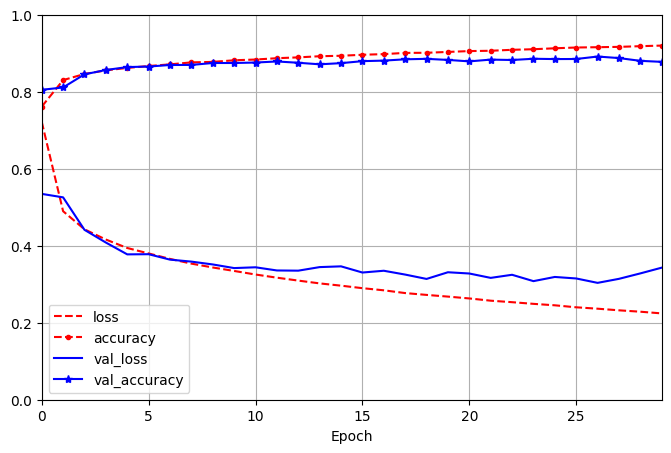

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3574 - accuracy: 0.8733


[0.35743147134780884, 0.8733000159263611]

In [12]:
X_new = X_test[:30]
y_proba = model.predict(X_test)
y_proba.round(2)

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.01, ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.  ]], dtype=float32)

In [13]:
# print(y_proba)
print(y_train)

[9 0 0 ... 9 0 2]


In [14]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [15]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [16]:
y_new = y_test[:30]
y_new

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3], dtype=uint8)

In [18]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score,recall_score
precision_recall_fscore_support(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average= None)
recall = recall_score(y_test, y_pred, average= None)
accuracy = accuracy_score(y_test,y_pred)
print("Precision Score: ",precision, "\nrecall", recall,"\nAccuracy Score",accuracy)


Precision Score:  [0.80182648 0.98580122 0.64590623 0.87671233 0.84596273 0.97556008
 0.81575037 0.92652672 0.97258883 0.97128205] 
recall [0.878 0.972 0.923 0.896 0.681 0.958 0.549 0.971 0.958 0.947] 
Accuracy Score 0.8733


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.65      0.92      0.76      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.85      0.68      0.75      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.82      0.55      0.66      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



# Question 3 
create a convolution neural network using the Fashion MNIST network

In [20]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [21]:
images.shape

TensorShape([2, 70, 120, 3])

In [22]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [23]:
fmaps.shape

TensorShape([2, 64, 114, 32])

In [24]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same")
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

In [25]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [26]:
biases.shape

(32,)

In [27]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [28]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)        

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [30]:
Wtbofore2 = time.time_ns()
cpubefore2 = time.process_time_ns()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 37s 20ms/step - loss: 0.6001 - accuracy: 0.7922 - val_loss: 0.3321 - val_accuracy: 0.8792
Epoch 2/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3196 - accuracy: 0.8863 - val_loss: 0.2626 - val_accuracy: 0.9042
Epoch 3/10
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2711 - accuracy: 0.9031 - val_loss: 0.2618 - val_accuracy: 0.9044
Epoch 4/10
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2427 - accuracy: 0.9130 - val_loss: 0.2453 - val_accuracy: 0.9066
Epoch 5/10
1719/1719 [==============================] - 44s 26ms/step - loss: 0.2234 - accuracy: 0.9200 - val_loss: 0.2474 - val_accuracy: 0.9108
Epoch 6/10
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2047 - accuracy: 0.9256 - val_loss: 0.2381 - val_accuracy: 0.9130
Epoch 7/10
1719/1719 [==============================] - 35s 20ms/step - loss: 0.1894 - accuracy: 0.9314 - val_loss: 0.2362 -

In [31]:
print("Wall Time:",time.time_ns()-Wtbofore2,"CPU Time:",time.process_time_ns()-cpubefore2)

Wall Time: 358967151000 CPU Time: 482145607000


In [32]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2755 - accuracy: 0.9095


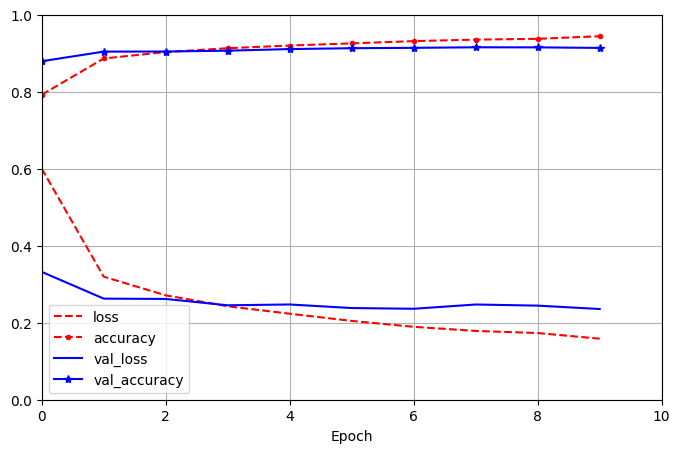

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 10], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [34]:
y_proba2 = model.predict(X_test)
y_proba2.round(2)

313/313 [==============================] - 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.16, 0.  , 0.  ]], dtype=float32)

In [35]:
import numpy as np
y_pred2 = y_proba2.argmax(axis=-1)
y_pred2

array([9, 2, 1, ..., 8, 1, 5])

In [36]:
from sklearn.metrics import precision_recall_fscore_support
precision2 = precision_score(y_test, y_pred2, average= None)
recall2 = recall_score(y_test, y_pred2, average= None)
accuracy2 = accuracy_score(y_test,y_pred2)
print("Precision Score: ",precision, "\nRecall Score", recall,"\nAccuracy Score",accuracy)

Precision Score:  [0.80182648 0.98580122 0.64590623 0.87671233 0.84596273 0.97556008
 0.81575037 0.92652672 0.97258883 0.97128205] 
Recall Score [0.878 0.972 0.923 0.896 0.681 0.958 0.549 0.971 0.958 0.947] 
Accuracy Score 0.8733


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.67      0.72      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

